In [3]:
# 1. Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
# 2. Load data
data = pd.read_csv(r'D:\Projects\AI-Projects\loan_approval_prediction\data\train.csv')
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# 3. Check for missing values
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# 4. Preprocessing: fill missing values
from sklearn.impute import SimpleImputer

# Numerical columns
num_imputer = SimpleImputer(strategy='mean')
data['LoanAmount'] = num_imputer.fit_transform(data[['LoanAmount']]).ravel()
data['Loan_Amount_Term'] = num_imputer.fit_transform(data[['Loan_Amount_Term']]).ravel()
data['Credit_History'] = num_imputer.fit_transform(data[['Credit_History']]).ravel()

# Categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data['Gender'] = cat_imputer.fit_transform(data[['Gender']]).ravel()
data['Married'] = cat_imputer.fit_transform(data[['Married']]).ravel()
data['Dependents'] = cat_imputer.fit_transform(data[['Dependents']]).ravel()
data['Self_Employed'] = cat_imputer.fit_transform(data[['Self_Employed']]).ravel()


In [8]:
# 5. Encode categorical features
label_enc_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
encoder = LabelEncoder()

for col in label_enc_cols:
    data[col] = encoder.fit_transform(data[col])


In [9]:
# 6. Drop Loan_ID
data.drop('Loan_ID', axis=1, inplace=True)


In [10]:
# 7. Split dataset
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# 8. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.7723577235772358

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



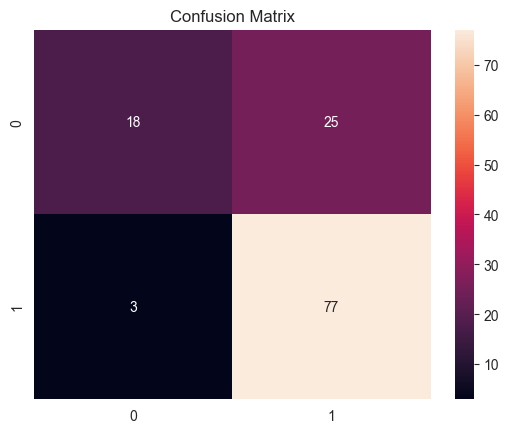

In [12]:
# 9. Evaluate model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [13]:
# 10. Prediction function
def predict_loan_approval(input_dict):
    input_df = pd.DataFrame([input_dict])

    # Same preprocessing as training
    for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']:
        input_df[col] = encoder.fit_transform(input_df[col])

    input_df['LoanAmount'] = input_df['LoanAmount'].fillna(data['LoanAmount'].mean())
    input_df['Loan_Amount_Term'] = input_df['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
    input_df['Credit_History'] = input_df['Credit_History'].fillna(data['Credit_History'].mean())

    prediction = model.predict(input_df)
    return 'Approved' if prediction[0] == 1 else 'Rejected'


In [14]:
# 11. Example Prediction
example = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1.0,
    'Property_Area': 'Urban'
}

predict_loan_approval(example)


'Approved'

In [17]:
# 10. Save the model
import joblib

# Save the trained model to a file
joblib.dump(model, "../models/loan_approval_model.pkl")

print("Model saved successfully as loan_approval_model.pkl")


Model saved successfully as loan_approval_model.pkl
